In [2]:
# Import modules
import pandas as pd
import pickle

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [2]:
#selecting the columns to use
columns_keep =['Age','Attrition',
 'OverTime',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsAtCompany',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Education', 
 'JobInvolvement',
 'JobLevel',
 'BusinessTravel_Travel_Frequently']

In [3]:
# Reading the data for the model
raw_data = pd.read_csv('../Resources/Data/Employee-Attrition.csv')

# Remove uncecessary columns and code binary ones Yes = 1 | No = 0
raw_data["Attrition"] = raw_data["Attrition"].eq('Yes').mul(1)
raw_data["OverTime"] = raw_data["OverTime"].eq('Yes').mul(1)
raw_data["Gender"] = raw_data["Gender"].eq('Female').mul(1)

# One-hot encode the data using pandas get_dummies
raw_data = pd.get_dummies(raw_data)




In [4]:
raw_data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,41,1,1102,1,2,1,1,2,1,94,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,1,2,3,0,61,...,0,0,0,1,0,0,0,1,0,1
2,37,1,1373,2,2,1,4,4,0,92,...,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,1,56,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,7,1,0,40,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,0,41,...,0,0,0,0,0,0,0,1,0,1
1466,39,0,613,6,1,1,2062,4,0,42,...,0,0,0,0,0,0,0,1,0,1
1467,27,0,155,4,3,1,2064,2,0,87,...,0,1,0,0,0,0,0,1,0,1
1468,49,0,1023,2,3,1,2065,4,0,63,...,0,0,0,0,1,0,0,1,0,1


In [5]:
# Split tha data

X = raw_data[columns_keep].values
X

y = raw_data['Attrition']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(1470, 25)
(1470,)


In [6]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(1058, 25)
(294, 25)
(118, 25)
(1058,)
(294,)
(118,)


In [7]:
# Apply the logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)
#Save the model
# pickle.dump(log_reg, open("LR_04", 'wb'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-3.72590328e-03,  2.41411080e-01,  8.91289227e-02,
        -2.10295985e-05,  1.32119516e-01, -2.60742473e-04,
         1.57322707e-03,  1.78564929e-06,  1.86022226e-05,
         1.10820030e-02, -4.19008042e-02, -1.17137645e-01,
        -6.61072025e-02, -7.16941343e-02, -5.63848539e-02,
        -4.32369009e-02, -7.03531438e-02, -6.02829849e-02,
        -3.03987518e-02,  8.11040868e-02, -7.84781244e-02,
         1.54555872e-02, -5.69760416e-02, -6.32756421e-03,
         3.39297647e-02]])

In [14]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))


The Training Accuracy is:  0.8402646502835539
The Testing Accuracy is:  0.8673469387755102
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       879
           1       0.92      0.06      0.12       179

    accuracy                           0.84      1058
   macro avg       0.88      0.53      0.51      1058
weighted avg       0.85      0.84      0.78      1058



In [15]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1.)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

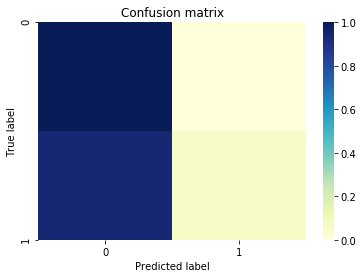

In [16]:
# Visualizing confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [12]:
cm_norm

array([[0.99886234, 0.00113766],
       [0.93854749, 0.06145251]])